# Setup 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

In [69]:
X, y = datasets.make_blobs(random_state = 10) 

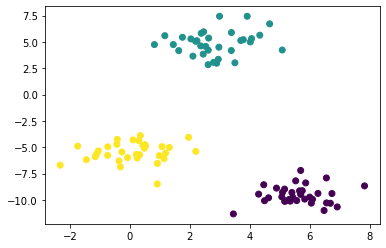

In [70]:
#this is an unsupervised algorithm, we dont really need to show the clusters' y value, but just for clarity
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

# K-Means 

Centroids updated after getting all values closest to them, repeated until convergence.

In [114]:
def euclidean(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[0] - p2[1])**2) 

In [115]:
def calc_new_centroid(X, clust_elems, index):
    res = [np.mean(X[clust_elems.get(index),0]), np.mean(X[clust_elems.get(index),1])]
    return res

In [125]:
c = 3
n_iter = 15
random.seed(1)

random_init = [random.choice(range(len(X))),random.choice(range(len(X))),random.choice(range(len(X)))]
centroids = [X[random_init[0],:],
             X[random_init[1],:],
             X[random_init[2],:]]
centroids

[array([3.49996332, 3.02156553]),
 array([2.36013594, 4.62719573]),
 array([  4.48697951, -10.07429823])]

In [126]:
cluster_elements = {
                0:[random_init[0]],
                1:[random_init[1]],
                2:[random_init[2]]}
cluster_elements

{0: [17], 1: [72], 2: [97]}

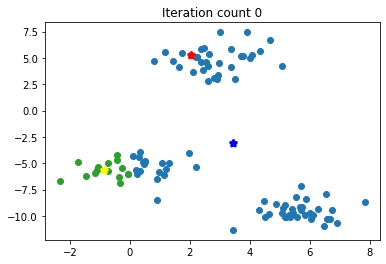

[[3.432449694856594, -3.0272935482176098], [2.0330020942970104, 5.289908172331242], [-0.8710717617975251, -5.637311849310996]]
88 1 14


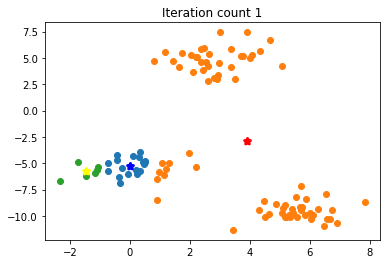

[[0.0060881629523231355, -5.213787498032476], [3.9003777910149218, -2.8417101399465126], [-1.472294658531464, -5.7730633203842805]]
18 76 6


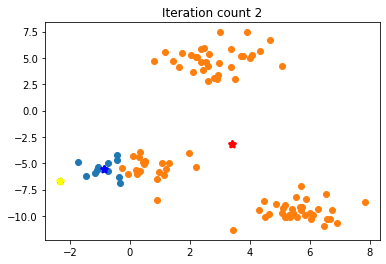

[[-0.865934233145932, -5.526430283705936], [3.4040314857568545, -3.1473385909228786], [-2.3249630829108145, -6.6999964008465644]]
11 88 1


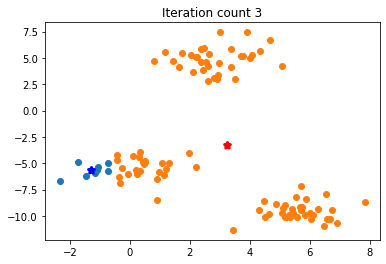

[[-1.2891697928724237, -5.670088592761427], [3.2393248852398533, -3.251041486747107], [nan, nan]]
8 92 0


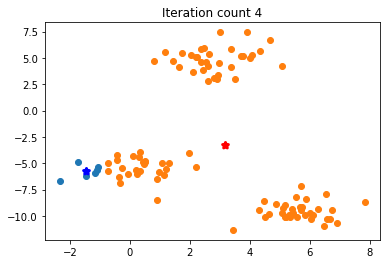

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


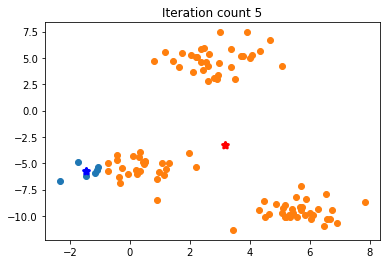

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


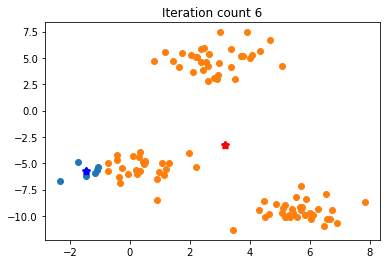

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


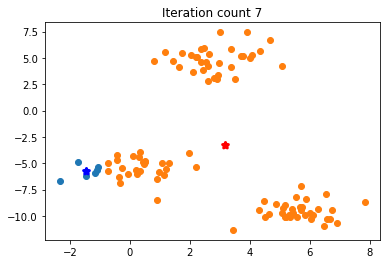

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


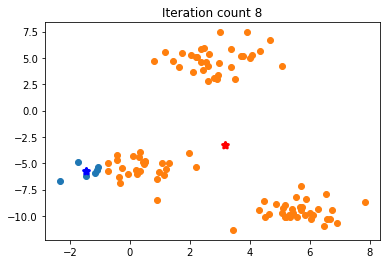

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


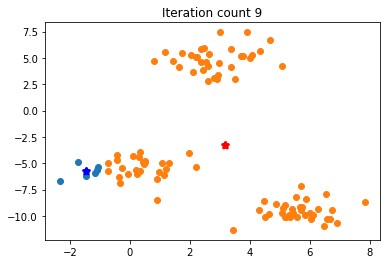

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


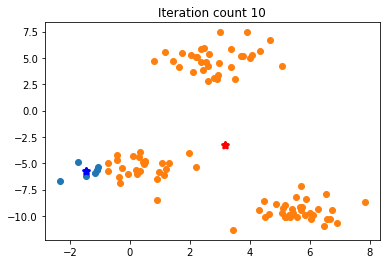

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


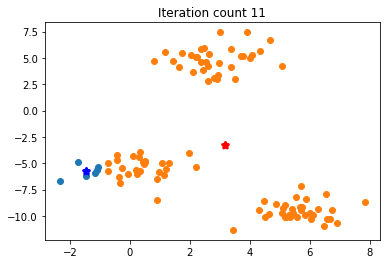

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


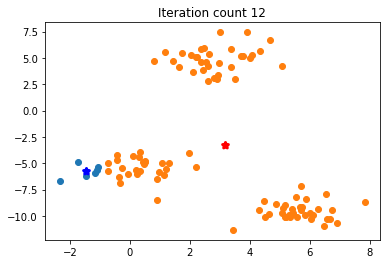

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


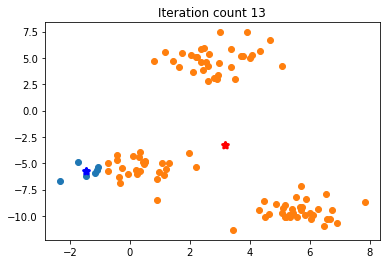

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


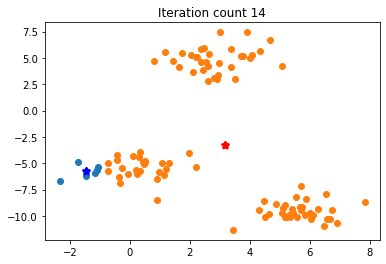

[[-1.472294658531464, -5.7730633203842805], [3.1546627558539995, -3.295937719154464], [nan, nan]]
6 94 0


In [118]:

for iter_count in range(n_iter):
    
    #check all points
    for i in range(len(X)):
        #look for min value and cluster
        min_distance = np.inf
        cent_idx = -1

        #for every element check the distance to all existing centroids
        for k in range(c):
            distance = euclidean(X[i], centroids[k])
            if distance < min_distance:
                cent_idx = k
                min_distance = distance

        #assigns element index to its closest centroid
        cluster_elements.get(cent_idx).append(i)

    #recalculate centroid
    centroids[0] = calc_new_centroid(X, cluster_elements, 0)
    centroids[1] = calc_new_centroid(X, cluster_elements, 1)
    centroids[2] = calc_new_centroid(X, cluster_elements, 2)
    
    #viz
    plt.scatter(X[cluster_elements.get(0),0],X[cluster_elements.get(0),1])
    plt.scatter(X[cluster_elements.get(1),0],X[cluster_elements.get(1),1])
    plt.scatter(X[cluster_elements.get(2),0],X[cluster_elements.get(2),1])
    plt.scatter(centroids[0][0], centroids[0][1], c = "blue", marker = "*", linewidths = 3)
    plt.scatter(centroids[1][0], centroids[1][1], c = "red", marker = "*", linewidths = 3)
    plt.scatter(centroids[2][0], centroids[2][1], c = "yellow", marker = "*", linewidths = 3)
    plt.title(f"Iteration count {iter_count}")
    plt.show()
    print(centroids)
    print(len(cluster_elements.get(0)),len(cluster_elements.get(1)),len(cluster_elements.get(2)))

    #reset points to clusters
    cluster_elements = {
                0:[],
                1:[],
                2:[]}

In [127]:
#check all points
for i in range(len(X)):
    #look for min value and cluster
    min_distance = np.inf
    cent_idx = -1

    #for every element check the distance to all existing centroids
    for k in range(c):
        distance = euclidean(X[i], centroids[k])
        if distance < min_distance:
            cent_idx = k
            min_distance = distance

    #assigns element index to its closest centroid
    cluster_elements.get(cent_idx).append(i)

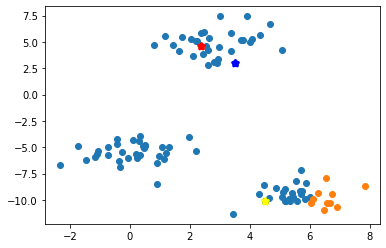

In [128]:
plt.scatter(X[cluster_elements.get(0),0],X[cluster_elements.get(0),1])
plt.scatter(X[cluster_elements.get(1),0],X[cluster_elements.get(1),1])
plt.scatter(X[cluster_elements.get(2),0],X[cluster_elements.get(2),1])
plt.scatter(centroids[0][0], centroids[0][1], c = "blue", marker = "*", linewidths = 3)
plt.scatter(centroids[1][0], centroids[1][1], c = "red", marker = "*", linewidths = 3)
plt.scatter(centroids[2][0], centroids[2][1], c = "yellow", marker = "*", linewidths = 3)

In [129]:
cluster_elements

{0: [17,
  0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  50,
  51,
  52,
  54,
  56,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  92,
  93,
  94,
  95,
  96,
  97,
  99],
 1: [72, 6, 33, 49, 53, 55, 58, 65, 71, 91, 98],
 2: [97]}